In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = {
    'sqft': [1500, 1800, 2400, 3000, 3500, 2000, 1700, 2200, 2500, 2800],
    'bedrooms': [3, 4, 3, 5, 4, 3, 2, 4, 4, 5],
    'bathrooms': [2, 3, 2, 4, 3, 2, 1, 3, 2, 3],
    'price': [300000, 360000, 400000, 520000, 580000, 390000, 310000, 450000, 470000, 510000]
}

df = pd.DataFrame(data)
df.head()

,sqft,bedrooms,bathrooms,price
0,1500,3,2,300000
1,1800,4,3,360000
2,2400,3,2,400000
3,3000,5,4,520000
4,3500,4,3,580000


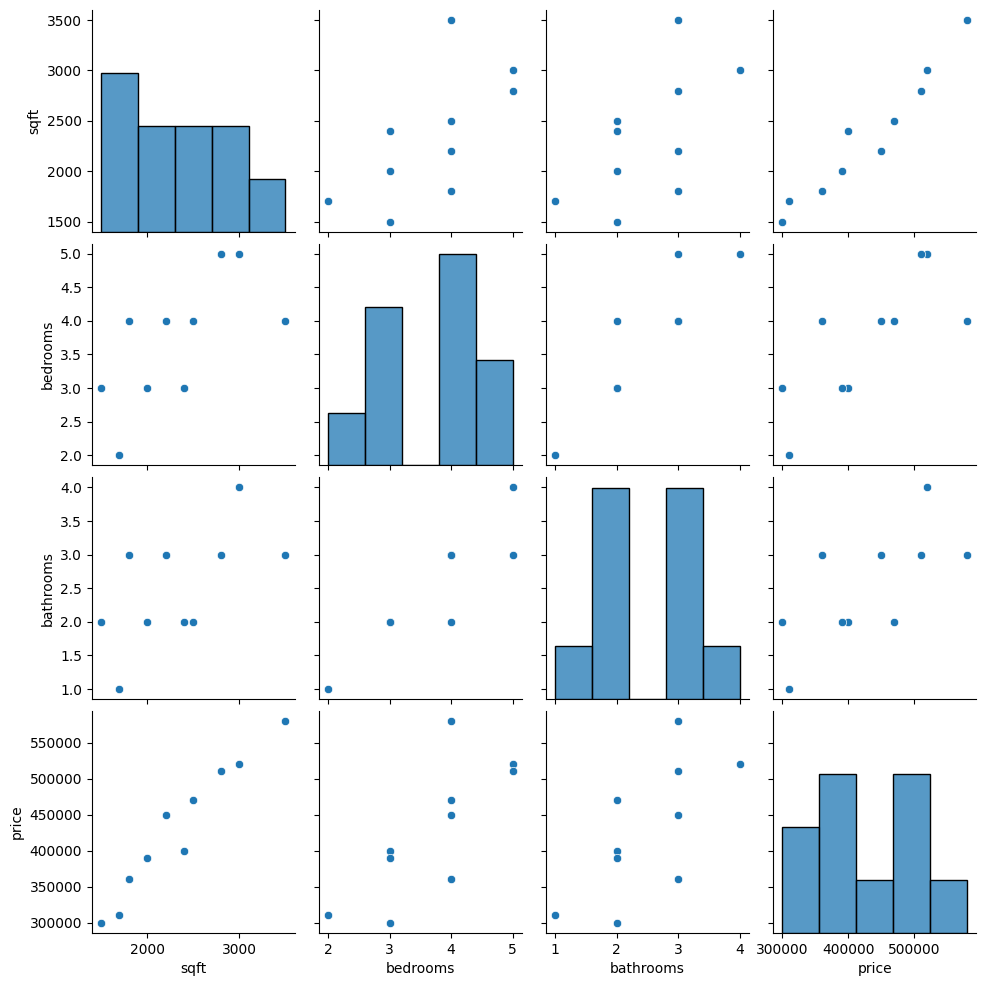

In [4]:
sns.pairplot(df)
plt.show()

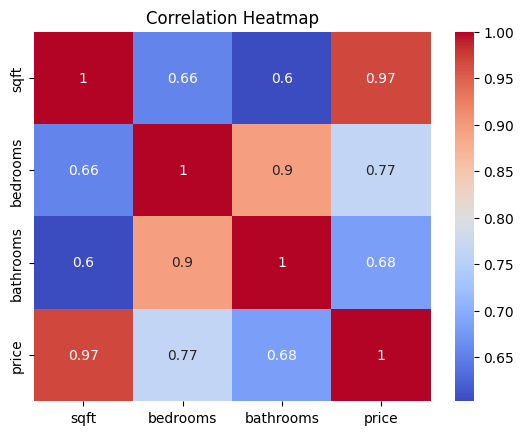

In [26]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [27]:
X = df[['sqft', 'bedrooms', 'bathrooms']]
y = df['price']

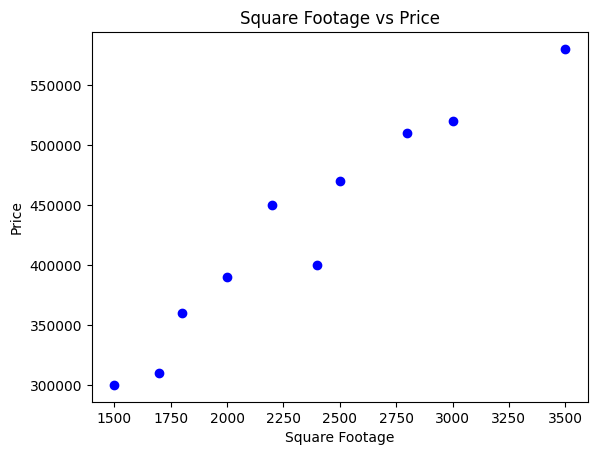

In [34]:
plt.scatter(df['sqft'], df['price'], color='blue')
plt.xlabel("Square Footage")
plt.ylabel("Price")
plt.title("Square Footage vs Price")
plt.show()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

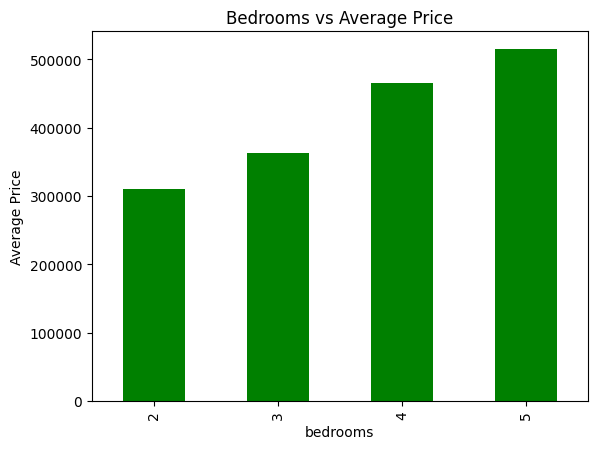

In [35]:
avg_price_by_bed = df.groupby('bedrooms')['price'].mean()
avg_price_by_bed.plot(kind='bar', color='green')
plt.ylabel("Average Price")
plt.title("Bedrooms vs Average Price")
plt.show()

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 70754.71698088653
Coefficients: [  115.09433962 19433.96226415  6603.77358491]


In [31]:
y_pred = model.predict(X_test)

In [32]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 331167675.32812715
R2 Score: 0.8905230825361563


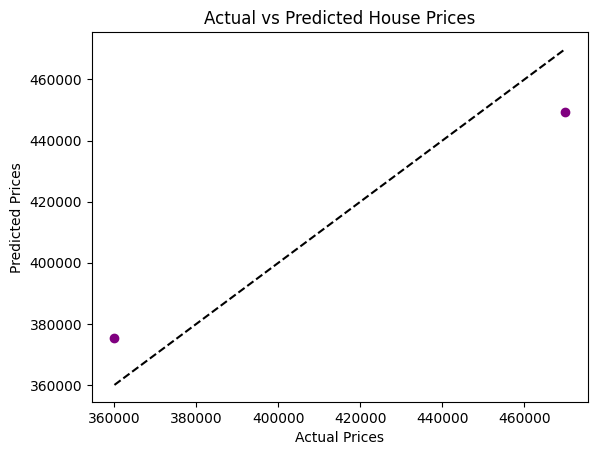

In [36]:
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # identity line
plt.show()

In [37]:
new_house = pd.DataFrame([[2600, 4, 3]], columns=['sqft', 'bedrooms', 'bathrooms'])
predicted_price = model.predict(new_house)
print("Predicted Price:", predicted_price)

Predicted Price: [467547.16981134]
